In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
from pandas.io.json import json_normalize
import numpy as np
from FUNCIONES_TASAS import *

In [12]:
df=abrir_datos(url="/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_DATOS/BASES_DE_DATOS/datos_20230420.json")

In [13]:
AL30D_N = df[df['ticker'] == 'AL30D'].reset_index(drop=True)
GD30D_N = df[df['ticker'] == 'GD30D'].reset_index(drop=True)
AL30_N = df[df['ticker'] == 'AL30'].reset_index(drop=True)
GD30_N = df[df['ticker'] == 'GD30'].reset_index(drop=True)

In [14]:
AL30D=limpiar_datos_tasas(AL30D_N)
AL30=limpiar_datos_tasas(AL30_N)
GD30D=limpiar_datos_tasas(GD30D_N)
GD30=limpiar_datos_tasas(GD30_N)

<Axes: xlabel='fecha'>

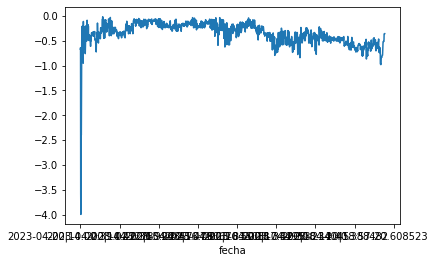

In [15]:
data["SPREAD_COMPRAR_T2"].plot()

<Axes: xlabel='fecha'>

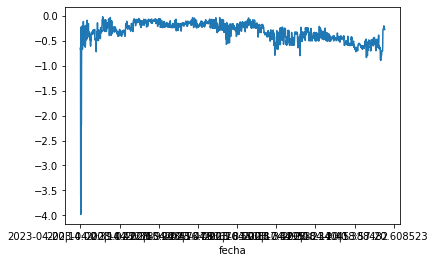

In [16]:
data["SPREAD_VENDER_T0"].plot()

<Axes: xlabel='fecha'>

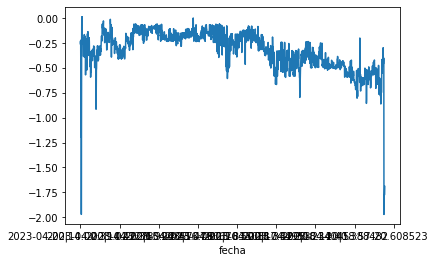

In [17]:
data["SPREAD_VENDER_T2"].plot()

# PREGUNTA  FRANCO SPREADS

**LO IDEAL SERIA IR HACIENDO UN APPEND POR CADA TIPO DE MOVIMIENTO,  UN SPREAD PARA COLOCAR(COMPRAR T0 Y VENDER T+2), OTRO SPREAD PARA TOMAR (VENDER T0 Y COMPRAR T2), PERO PARA COMPRAR T0 Y VENDER T+2 EXISTEN 2 POSIBILIDADES ASIMISMO PARA VENDER T0 Y COMPRAR T+2. ESTOS SON LOS ESCENARIO**


- Comprar T0 y vender T+2, utilizando el spread de comprar T0.


- Comprar T0 y vender T+2, utilizando el spread de vender T+2.


- Vender T0 y comprar T+2, utilizando el spread de vender T0.


- Vender T0 y comprar T+2, utilizando el spread de comprar T+2.

**SI NOTAMOS EN ESTE CASO DEBERIAMOS DE CALCULAR 4 SPREADS, NO 2. TENDRIA 2 SPREADS DE COMPRA T0 Y VENTA T+2, UNO MEDIANTE EL SPREAD DE VENTA DE T+2 Y OTRO SPREAD MEDIANTE EL SPREAD DE COMPRA T0, ASIMISMO SUCEDERIA PARA VENTA T0 Y COMPRA T+2 POR LO QUE AL FINAL TENDRIAMOS 4 SPREADS DISTINTOS, ASI LO MODELO??**

In [10]:
contar_comprart0_vendert2=0
contar_vender0_comprar_t2=0

data=GD30
data["SPREAD_COMPRAR_T0"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COMPRAR_T2"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_VENDER_T0"] = data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) 
data["SPREAD_VENDER_T2"] = data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) 




data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COMPRAR_T0","SPREAD_COMPRAR_T2","SPREAD_VENDER_T0","SPREAD_VENDER_T2"]]

data_general["POSITION_COMPRAR_T0"] = 0
data_general["POSITION_VENDER_T0"] = 0
data_general["POSITION_COMPRAR_T2"] = 0
data_general["POSITION_VENDER_T2"] = 0

current_state_comprar_t0_vender_t2 = 0
current_state_vender_t0_comprar_t0 = 0

lista_spread_comprar_t0=[]
lista_spread_vender_t0=[]

threshold_closing = 0.001
threshold_arbitrage=0
lista=[]

for index, row in data_general.iterrows():
    
    # CASO NO PASA NADA
    if row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T0"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        continue
        

    # CASOS EN EL QUE SOLO UNO PASA ALGUN THRESHOLD GANADOR
    #COMPRAR T0 VENDER T2
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        data_general.at[index, "POSITION_COMPRAR_T0"] = 1
        data_general.at[index, "POSITION_VENDER_T0"] = 0
        data_general.at[index, "POSITION_COMPRAR_T2"] = 0
        data_general.at[index, "POSITION_VENDER_T2"] = -1
        contar_comprart0_vendert2+=1
        
    #VENDER T0 COMPRAR T2
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        data_general.at[index, "POSITION_COMPRAR_T0"] = 0
        data_general.at[index, "POSITION_VENDER_T0"] = -1
        data_general.at[index, "POSITION_COMPRAR_T2"] = 1
        data_general.at[index, "POSITION_VENDER_T2"] = 0
        contar_vender0_comprar_t2+=1
        
    #VENDER T0 COMPRAR T2
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage :
        data_general.at[index, "POSITION_COMPRAR_T0"] = 0
        data_general.at[index, "POSITION_VENDER_T0"] = -1
        data_general.at[index, "POSITION_COMPRAR_T2"] = 1
        data_general.at[index, "POSITION_VENDER_T2"] = 0
        contar_vender0_comprar_t2+=1
        
    #COMPRAR T0 VENDER T2
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        data_general.at[index, "POSITION_COMPRAR_T0"] = 1
        data_general.at[index, "POSITION_VENDER_T0"] = 0
        data_general.at[index, "POSITION_COMPRAR_T2"] =0
        data_general.at[index, "POSITION_VENDER_T2"] = -1
        contar_comprart0_vendert2+=1
    
        
    #CASOS EN EL QUE MAS DE 2 PASA THRESHOLD GANADOR
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        #COMPRAR T0 VENDER T2
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_T0"]) == abs(row["SPREAD_COMPRAR_T2"]):
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
        
        #VENDER T0 COMPRAR T2
        else: 
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_vender0_comprar_t2+=1
                 
            
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        #VENDER T0 COMPRAR T2. CORREGIR LA IGUALDAD
        if abs(row["SPREAD_VENDER_T0"]) > abs(row["SPREAD_VENDER_T2"]) or abs(row["SPREAD_VENDER_T0"]) == abs(row["SPREAD_VENDER_T2"]):
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_vender0_comprar_t2+=1

        #COMPRAR T0 VENDER T2    
        else:
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
            
    # CASOS EN EL QUE 3 SE CUMPLEN, CUAL ELEGIMOS
    # PENDIENTE
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        #COMPRAR T0 VENDER T2
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_T0"]) == abs(row["SPREAD_COMPRAR_T2"]):
            
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            #vender t0 y comprar t2
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_vender0_comprar_t2+=1
            
            
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_T0"]) == abs(row["SPREAD_COMPRAR_T2"]):
            #COMPRAR T0 VENDER T2
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            #vender t0 y comprar t2
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_vender0_comprar_t2+=1
            
            
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_T0"]) == abs(row["SPREAD_COMPRAR_T2"]):
            #COMPRAR T0 VENDER T2
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            #vender t0 y comprar t2
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_vender0_comprar_t2+=1
            
    
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_TO"]) == abs(row["SPREAD_COMPRAR_T2"]):
            #COMPRAR T0 VENDER T2
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            #vender t0 y comprar t2
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_vender0_comprar_t2+=1
            
    
            
    # CASO EN EL QUE TODOS PASAN Y SON BUENA OPCION DE TRADE        
    
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        max_comprar = max(abs(row["SPREAD_COMPRAR_T0"]), abs(row["SPREAD_COMPRAR_T2"]))
        max_vender = max(abs(row["SPREAD_VENDER_T0"]), abs(row["SPREAD_VENDER_T2"]))
            
        if max_comprar>max_vender:
            #comprar t0 y vender t2
            if max_comprar==abs(row["SPREAD_COMPRAR_TO"]):
                data_general.at[index, "POSITION_COMPRAR_T0"] = 1
                data_general.at[index, "POSITION_VENDER_T0"] = 0
                data_general.at[index, "POSITION_COMPRAR_T2"] = 0
                data_general.at[index, "POSITION_VENDER_T2"] = -1
                contar_comprart0_vendert2+=1
                
            elif max_comprar==abs(row["SPREAD_COMPRAR_T2"]):
                #vender t0 y comprar t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 0
                data_general.at[index, "POSITION_VENDER_T0"] = -1
                data_general.at[index, "POSITION_COMPRAR_T2"] = 1
                data_general.at[index, "POSITION_VENDER_T2"] = 0
                contar_vender0_comprar_t2+=1
                
        elif max_comprar<max_vender:
            if max_vender==abs(row["SPREAD_VENDER_T0"]):
                #vender t0 y comprar t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 0
                data_general.at[index, "POSITION_VENDER_T0"] = -1
                data_general.at[index, "POSITION_COMPRAR_T2"] = 1
                data_general.at[index, "POSITION_VENDER_T2"] = 0
                contar_vender0_comprar_t2+=1
                
            elif max_vender==abs(row["SPREAD_VENDER_T2"]):
                 #comprar t0 y vender t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 1
                data_general.at[index, "POSITION_VENDER_T0"] = 0
                data_general.at[index, "POSITION_COMPRAR_T2"] = 0
                data_general.at[index, "POSITION_VENDER_T2"] = -1
                contar_comprart0_vendert2+=1
                
                
        elif max_comprar==max_vender:
    
            if max_vender==abs(row["SPREAD_VENDER_T0"]) and max_comprar==abs(row["SPREAD_COMPRAR_T2"]):
                #vender t0 comprar t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 0
                data_general.at[index, "POSITION_VENDER_T0"] = -1
                data_general.at[index, "POSITION_COMPRAR_T2"] = 1
                data_general.at[index, "POSITION_VENDER_T2"] = 0
                contar_vender0_comprar_t2+=1
                
            elif max_vender==abs(row["SPREAD_VENDER_T2"]) and max_comprar==abs(row["SPREAD_COMPRAR_T0"]):
                #comprar t0 y vender t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 1
                data_general.at[index, "POSITION_VENDER_T0"] = 0
                data_general.at[index, "POSITION_COMPRAR_T2"] = 0
                data_general.at[index, "POSITION_VENDER_T2"] = -1 
                contar_comprart0_vendert2+=1
            else:
                #comprar t0 y vender t2
                data_general.at[index, "POSITION_COMPRAR_TO0"] = 1
                data_general.at[index, "POSITION_VENDER_T0"] = 0
                data_general.at[index, "POSITION_COMPRAR_T2"] = 0
                data_general.at[index, "POSITION_VENDER_T2"] = -1
                contar_comprart0_vendert2+=1
                
    #CIERRE DE POSICIONES TENTATIVO
    else:
        data_general.at[index, "POSITION_COMPRAR_T0"] = 0
        data_general.at[index, "POSITION_VENDER_T0"] = 0
        data_general.at[index, "POSITION_COMPRAR_T2"] = 0
        data_general.at[index, "POSITION_VENDER_T2"] = 0

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_66505/3866062674.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_general["POSITION_COMPRAR_T0"] = 0
/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_66505/3866062674.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_general["POSITION_VENDER_T0"] = 0
/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_66505/3866062674.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [8]:
contar_comprart0_vendert2

986

In [9]:
contar_vender0_comprar_t2

955